### Task 3: Multinomial Naive Bayes on Word Frequencies

**Import packages**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

**Step 1: Reuse the same SMS Spam dataset from Task 1**

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df['label'] = df.label.map({'ham': 0, 'spam': 1})
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


**Step 2: Use CountVectorizer (without binary=True) to extract word frequency features**

In [5]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])

**Step 3: Split the data into training and test sets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.30, random_state=42)
X_train.shape, X.shape

((3900, 8713), (5572, 8713))

**Step 4: Initialize and train a MultinomialNB model**

In [7]:
model = MultinomialNB()
model = model.fit(X_train, y_train)

**Step 5: Evaluate the model with appropriate metrics**

In [9]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:', cf_matrix)

Accuracy: 0.9850478468899522
Confusion Matrix: [[1432   16]
 [   9  215]]


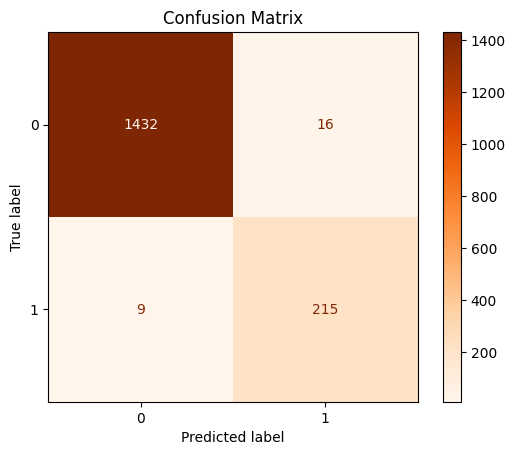

In [11]:
dsp = ConfusionMatrixDisplay(cf_matrix)
dsp.plot(cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
plt.show()